## 파이썬 기초다루기
### 데이터 시각화
#### 0630memo

-----

#### Python 시각화 _ 기본 툴

In [18]:
# 기본 패키지
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline   

> - % 명령은 마법같은 기능을 제공해주는 Magic Command  
> - 파이썬 코드가 아니라 jupyter에게 특정 기능을 수행하도록 하는 명령   
> - %matplotlib inline = show 명령어 없이도 바로 그래프로 보여주는 툴이다.

* 내장함수 plot  
> kind = 종류 / line, bar, barh (수평 막대), 'hist', 'box', 'pie', 'scatter' 등

In [19]:
df = pd.read_excel('data/남북한발전전력량.xlsx')

In [15]:
# 데이터 프레임 제작

df_ns = df.iloc[[0,5],3:] # 필요 행,열 추출
df_ns.index = ['South','North'] # 행 인덱스 변경
df_ns.columns = df_ns.columns.map(int) #열 이름 정수형으로 교체 

### `-` 선 그래프 

<AxesSubplot:>

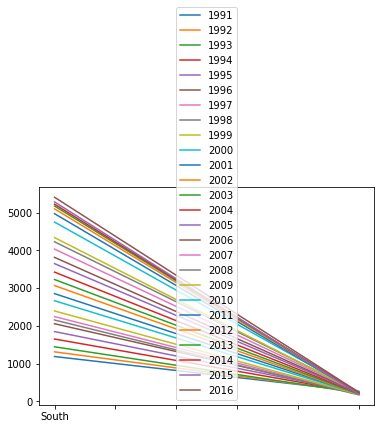

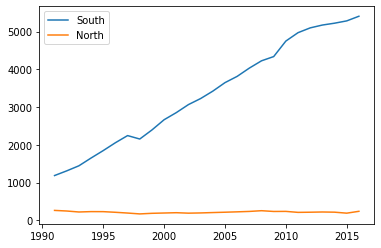

In [16]:
df_ns.plot() 

tdf_ns = df_ns.T # 행열 전치하기 
tdf_ns.plot()

그래프를 보면 알겠지만 열의 개수대로 선이 나오고 인덱스 = X , 값 = Y가 되는걸 알 수 있다. 

### `-` 막대그래프

> * 그래프를 보고 효과적인 시각화 진행해야함 
> * 여전히 선은 열에 따라서 x는 인덱스 y는 값

<AxesSubplot:>

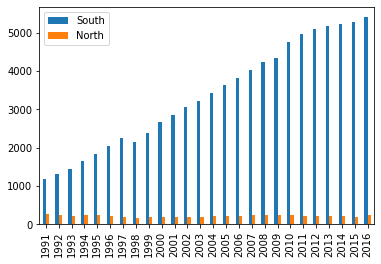

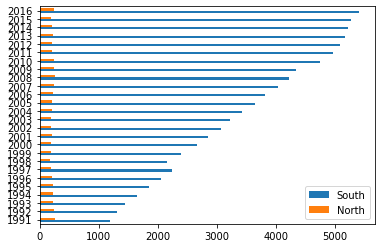

In [19]:
tdf_ns.plot(kind = 'bar') 
tdf_ns.plot(kind = 'barh')

### `-` 히스토그램

> * 데이터의 고유값들의 누적값을 표현해주는 그래프

<AxesSubplot:ylabel='Frequency'>

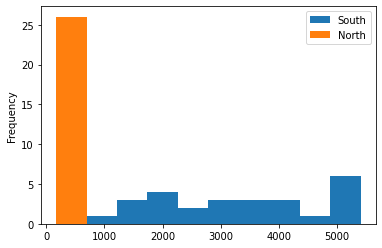

In [22]:
tdf_ns.plot(kind = 'hist')

### `-` 산점도 

In [26]:
mpg = pd.read_csv('data/auto-mpg.csv', header = None)
mpg.columns = ['mpg', 'cylinders','displacement','horsepower','weight','acceleration','model year','orignin','name']

<AxesSubplot:xlabel='weight', ylabel='mpg'>

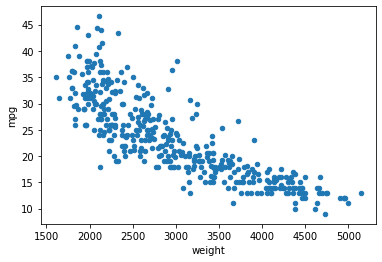

In [28]:
mpg.plot(kind = 'scatter', x = 'weight', y = 'mpg')

### `-` 박스플롯 

> - 열 선택으로 그래프를 선택하여 그릴 수 있다. 

<AxesSubplot:>

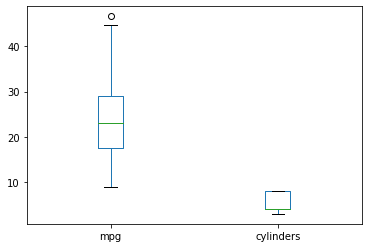

In [31]:
mpg[['mpg','cylinders']].plot(kind='box') 

--------

## Matplotlib 

> `-` 데이터를 차트나 플롯으로 그려주는 패키지   
> `-` 가장 많이 쓰이는 시각화 패키지 (아마 쉽고 편해서 이겠지?)  
> `-` 다양한 스타일의 그래프 제공  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

# 한글 폰트 문제 해결 

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']=False
path='c:/Windows/Fonts/malgun.ttf'
font_name=font_manager.FontProperties(fname=path).get_name()
rc('font',family=font_name)

Text(0.5, 1.0, '제목')

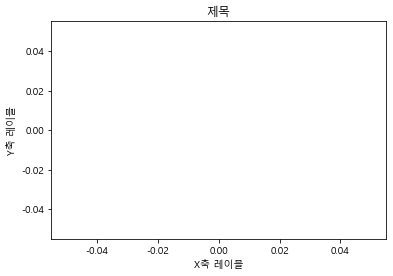

In [2]:
plt.plot() # 기본 틀을 만든다.  
plt.xlabel('X축 레이블') 
plt.ylabel('Y축 레이블') 
plt.title('제목')

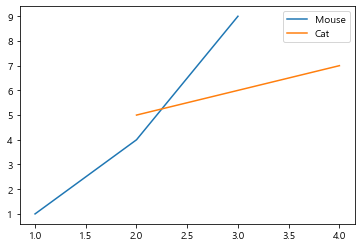

In [5]:
plt.plot([1,2,3],[1,4,9]) # 데이터를 넣는다. 
plt.plot([2,3,4],[5,6,7]) # 덧댈 수 있다. 
plt.legend(['Mouse','Cat'])
plt.show() # 매직 커맨드 때문에 쓸 필요는 없지만 어쨋든 작성한 코드를 시각화 하는 함수 

### `-` 다양한 차트 및 플롯

### * 막대그래프 

<BarContainer object of 8 artists>

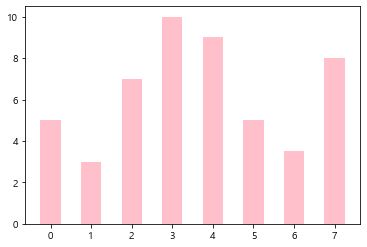

In [16]:
y = [5,3,7,10,9,5,3.5,8]
x = range(len(y))

plt.bar(x,y, width = 0.5, color = 'pink') # width < 폭 

### * 시각화 실습하기 1|

C:\Users\Oldcar\anaconda3\envs\py38r40\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


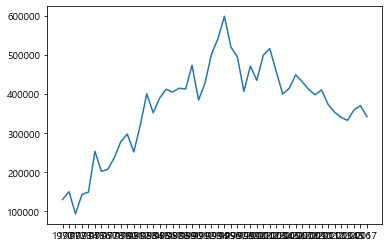

In [3]:
## 데이터 전처리 ##

df = pd.read_excel('data/시도별 전출입 인구수.xlsx')
df = df.fillna(method='ffill') # fillna() = 결측치 채우는 함수 / method = 'ffill' 은 앞 데이터 채움

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리

mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') # 조건식
df_seoul = df[mask] # 조건 추출
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택

sr_one = df_seoul.loc['경기도']
plt.plot(sr_one.index, sr_one.values) # x, y축 데이터를 plot 함수에 입력

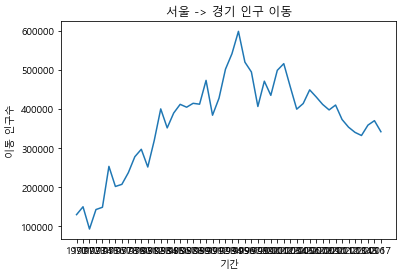

In [4]:
plt.plot(sr_one) # 판다스 객체를 plot 함수에 입력
# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')
# 축이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')
plt.show()

`-` 그래프 꾸미기 
> style.use() : 스타일 서실  
> size 속성 : 크기   
> marker : 마커  

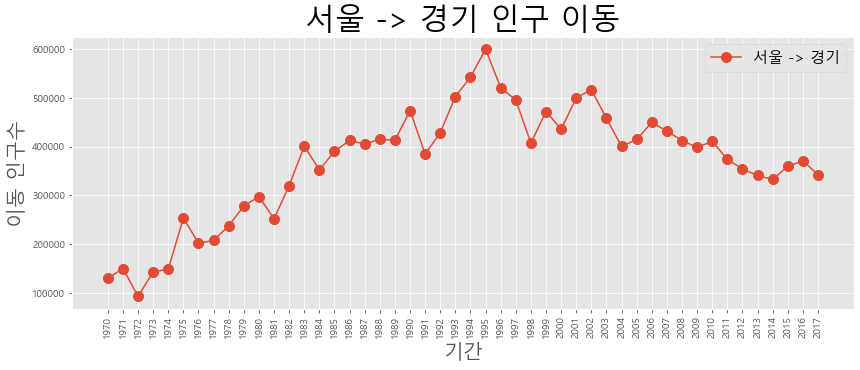

In [44]:
plt.style.use('ggplot')
plt.figure(figsize = (14,5)) # 전체 틀 사이즈 정하기 

plt.xticks(size=10, rotation='vertical') # x축 이름들 사이즈랑 위치 지정 

# 마커 표시 추가
plt.plot(sr_one, marker='o', markersize=10) # 점 스타일
plt.title('서울 -> 경기 인구 이동', size=30) #차트 제목
plt.xlabel('기간', size=20) #x축 이름
plt.ylabel('이동 인구수', size=20) #y축 이름
plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15) # 제목
plt.show()

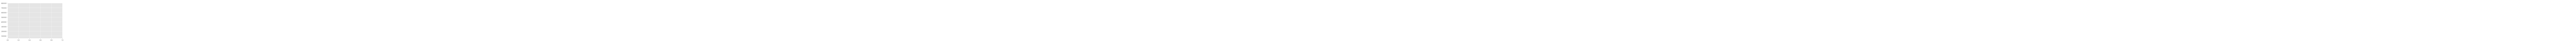

In [7]:
# y축 범위 지정 (최소값, 최대값)
plt.ylim(50000, 800000)

# 주석 표시 - 화살표
plt.annotate('',
             xy=(20, 620000), #화살표의 머리 부분(끝점)
             xytext=(2, 290000), #화살표의 꼬리 부분(시작점)
             xycoords='data', #좌표체계
             arrowprops=dict(arrowstyle='->', color='skyblue', lw=5), #화살표서식
            )

plt.annotate('',
             xy=(47, 450000), #화살표의 머리 부분(끝점)
             xytext=(30, 580000), #화살표의 꼬리 부분(시작점)
             xycoords='data', #좌표체계
             arrowprops=dict(arrowstyle='->', color='olive', lw=5), #화살표서식
            )

# 주석 표시 - 텍스트
plt.annotate('인구이동 증가(1970-1995)', #텍스트 입력
             xy=(10, 550000), #텍스트 위치 기준점
             rotation=25, #텍스트 회전각도
             va='baseline', #텍스트 상하 정렬
             ha='center', #텍스트 좌우 정렬
             fontsize=15, #텍스트 크기
            )

plt.annotate('인구이동 감소(1995-2017)', #텍스트 입력
             xy=(40, 560000), #텍스트 위치 기준점
             rotation=-11, #텍스트 회전각도
             va='baseline', #텍스트 상하 정렬
             ha='center', #텍스트 좌우 정렬
             fontsize=15, #텍스트 크기
            )

plt.show() # 변경사항 저장하고 그래프 출력

### * 시각화 실습하기 2

<ipython-input-8-1e0d32f06666>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(col_years, rotation=90)
<ipython-input-8-1e0d32f06666>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(col_years, rotation=90)
<ipython-input-8-1e0d32f06666>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(col_years, rotation=90)
<ipython-input-8-1e0d32f06666>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(col_years, rotation=90)


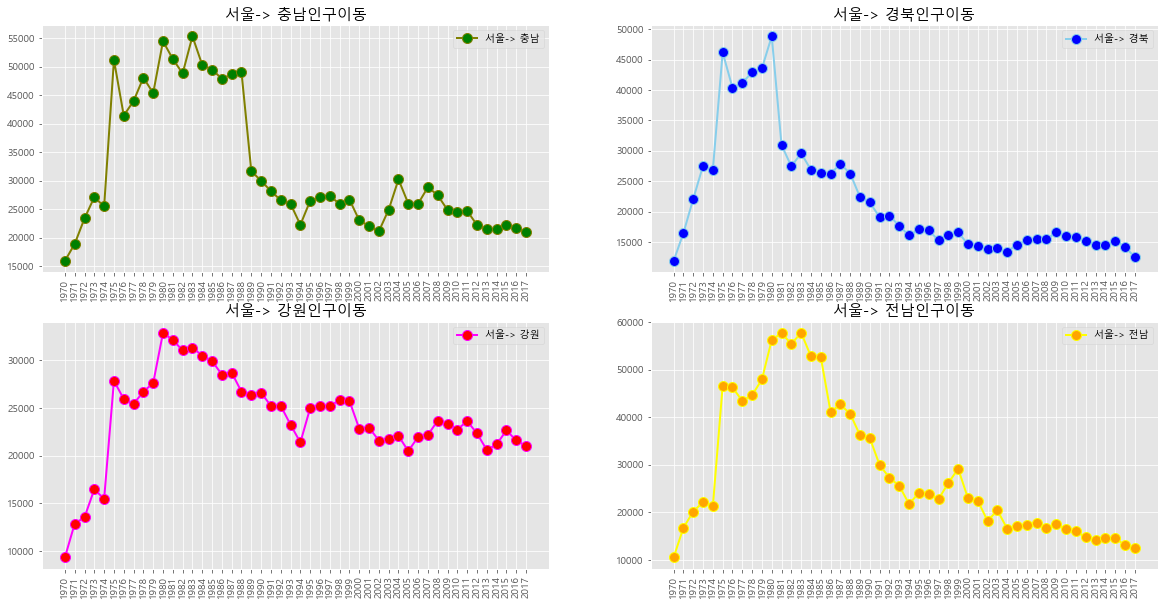

In [8]:
# 서울에서'충청남도','경상북도', '강원도', '전라남도'로이동한인구데이터값만선택
col_years= list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
plt.style.use('ggplot') # 스타일서식지정

# 그래프객체생성(figure에1개의서브플롯을생성)
fig = plt.figure(figsize=(20, 10)) 
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# axe 객체에plot 함수로그래프출력
ax1.plot(col_years, df_4.loc['충청남도',:], marker='o', markerfacecolor='green', 
markersize=10, color='olive', linewidth=2, label='서울-> 충남')
ax2.plot(col_years, df_4.loc['경상북도',:], marker='o', markerfacecolor='blue', 
markersize=10, color='skyblue', linewidth=2, label='서울-> 경북')
ax3.plot(col_years, df_4.loc['강원도',:], marker='o', markerfacecolor='red', 
markersize=10, color='magenta', linewidth=2, label='서울-> 강원')
ax4.plot(col_years, df_4.loc['전라남도',:], marker='o', markerfacecolor='orange', 
markersize=10, color='yellow', linewidth=2, label='서울-> 전남')

# 범례표시
ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')

# 차트제목추가
ax1.set_title('서울-> 충남인구이동', size=15)
ax2.set_title('서울-> 경북인구이동', size=15)
ax3.set_title('서울-> 강원인구이동', size=15)
ax4.set_title('서울-> 전남인구이동', size=15)

# 축눈금라벨지정및90도회전
ax1.set_xticklabels(col_years, rotation=90)
ax2.set_xticklabels(col_years, rotation=90)
ax3.set_xticklabels(col_years, rotation=90)
ax4.set_xticklabels(col_years, rotation=90)

plt.show() # 변경사항저장하고그래프출력

`-` 면적 그래프

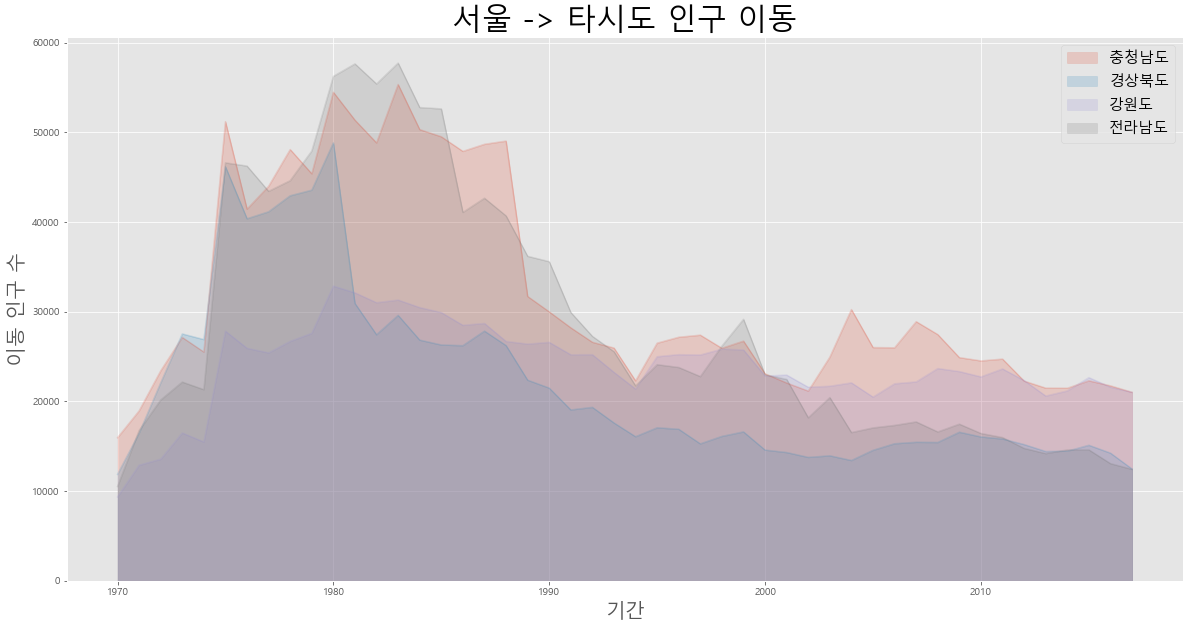

In [10]:
# 서울에서'충청남도','경상북도', '강원도', '전라남도'로이동한인구데이터값만선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()
plt.style.use('ggplot') 
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기
df_4.plot(kind='area', stacked=False, alpha=0.2, figsize=(20, 10))
plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)
plt.show()

`-` 히스토그램

`-` 파이차트

### Seaborn
> - 시각화 고급 패키지

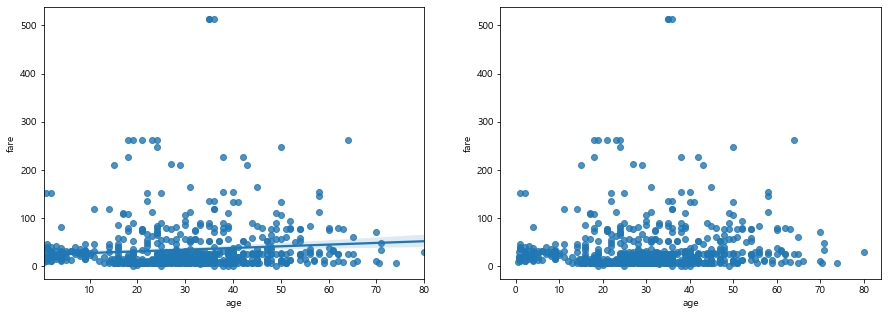

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic') # 내장 되어 있음

# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5)) 
ax1 = fig.add_subplot(1, 2, 1) # 그래프 쪼개서 작성하기 
ax2 = fig.add_subplot(1, 2, 2)

# 그래프 그리기 - 선형회귀선 표시(fit_reg=True) / regplot()이 회귀선을 내장하고 있다. 
sns.regplot(x='age', #x축 변수 
            y='fare', #y축 변수
            data=titanic, #데이터
            ax=ax1) #axe 객체 - 1번째 그래프


# 그래프 그리기 - 선형회귀선 미표시(fit_reg=False)
sns.regplot(x='age', #x축 변수
            y='fare', #y축 변수
            data=titanic, #데이터
            ax=ax2, #axe 객체 - 2번째 그래프
            fit_reg=False) #회귀선 미표시

plt.show()

`-` 히스토그램/커널 밀도 함수
> displot() 단일변수 데이터의 분포를 확인 할 수 있다!

C:\Users\Oldcar\anaconda3\envs\py38r40\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Oldcar\anaconda3\envs\py38r40\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Oldcar\anaconda3\envs\py38r40\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

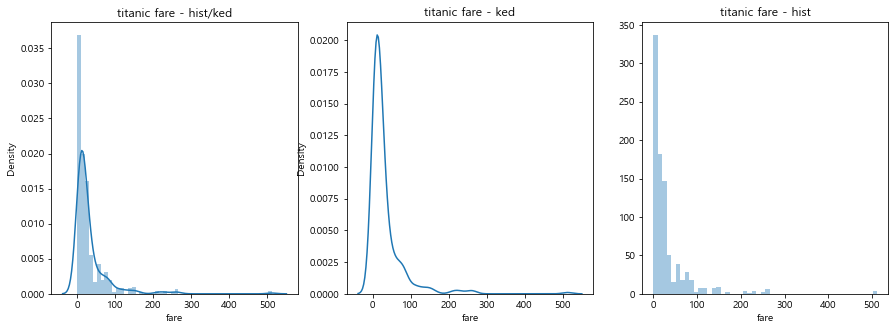

In [3]:
# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5)) 
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# 기본값
sns.distplot(titanic['fare'], ax=ax1) 

# hist=False
sns.distplot(titanic['fare'], hist=False, ax=ax2) 

# kde=False
sns.distplot(titanic['fare'], kde=False, ax=ax3) 

# 차트 제목 표시
ax1.set_title('titanic fare - hist/ked')
ax2.set_title('titanic fare - ked')
ax3.set_title('titanic fare - hist')
plt.show()

`-` 히트맵 (괜찮은데??)

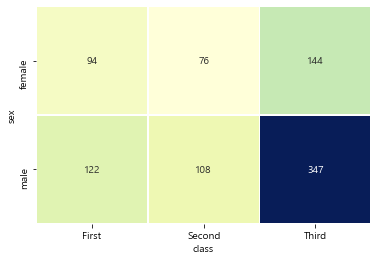

In [4]:
# 피벗테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
table = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size')

# 히트맵 그리기
sns.heatmap(table, # 데이터프레
            annot=True, fmt='d', # 데이터 값 표시 여부, 정수형 포맷
            cmap='YlGnBu', # 컬러 맵
            linewidth=.5, # 구분 선
            cbar=False) # 컬러 바 표시 여부
plt.show()

`-` 범주형 데이터의 산점도 
> stripplot()   
> swarmplot() 데이터 분산 고려

C:\Users\Oldcar\anaconda3\envs\py38r40\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


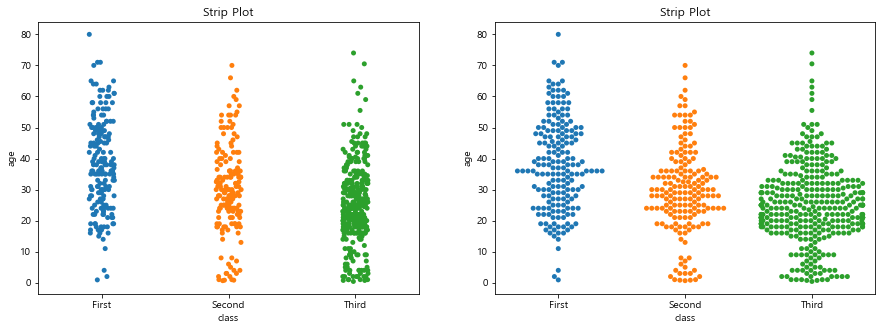

In [5]:
# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5)) 
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# 이산형 변수의 분포 - 데이터 분산 미고려 / 나름 응집해 있긴함 
sns.stripplot(x="class", #x축 변수
              y="age", #y축 변수
              data=titanic, #데이터셋 - 데이터프레임
              ax=ax1) #axe 객체 - 1번째 그래프

# 이산형 변수의 분포 - 데이터 분산 고려 (중복 X) 
sns.swarmplot(x="class", #x축 변수
              y="age", #y축 변수
              data=titanic, #데이터셋 - 데이터프레임
              ax=ax2) #axe 객체 - 2번째 그래프

# 차트 제목 표시
ax1.set_title('Strip Plot')
ax2.set_title('Strip Plot')
plt.show()

`-` 막대그래프 활용 

In [6]:
# x축, y축에 변수 할당
sns.barplot(x='sex', y='survived', data=titanic, ax=ax1)

# x축, y축에 변수 할당하고 hue 옵션 추가
sns.barplot(x='sex', y='survived', hue='class', data=titanic, ax=ax2) 

# x축, y축에 변수 할당하고 hue 옵션을 추가하여 누적 출력
sns.barplot(x='sex', y='survived', hue='class', dodge=False, data=titanic, ax=ax3) 

# 차트 제목 표시
ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class(stacked)')

plt.show()